In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

# Get Data

In [2]:
df = pd.read_csv('./sandtander.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Clean Data
#### Geography & Gender

In [3]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [4]:
# change gender to binary
df['Gender'] = df['Gender'].map( {'Male':1, 'Female':0} )
# change country
df['Geography'] = df['Geography'].map( {'France':0, 'Spain':1, 'Germany': 2} )

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,1,0,43,2,125510.82,1,1,1,79084.10,0


#### Any strange values?

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,0.749500,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,0.830433,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,2.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### Delete OR Store 

In [7]:
# We could do all this 
# df = df.drop("CreditScore", axis=1)
# df = df.drop("CustomerId", axis=1)
# df = df.drop("RowNumber", axis=1)
# df = df.drop("Surname", axis=1)
df = df[0:100]
data = df.loc[:, "Geography":]
data.head()

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,42,2,0.00,1,1,1,101348.88,1
1,1,0,41,1,83807.86,1,0,1,112542.58,0
2,0,0,42,8,159660.80,3,1,0,113931.57,1
3,0,0,39,1,0.00,2,0,0,93826.63,0
4,1,0,43,2,125510.82,1,1,1,79084.10,0


In [8]:
creditScore = df['CreditScore']
creditScore.head()

0    619
1    608
2    502
3    699
4    850
Name: CreditScore, dtype: int64

#### Download Data

In [9]:
type(data)
data.to_json('01_data.json', orient='records')

#### Add credit score and download

In [10]:
data['creditScore'] = creditScore 
data.to_json('02_data.json', orient='records')

In [11]:
data.head()

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,creditScore
0,0,0,42,2,0.00,1,1,1,101348.88,1,619
1,1,0,41,1,83807.86,1,0,1,112542.58,0,608
2,0,0,42,8,159660.80,3,1,0,113931.57,1,502
3,0,0,39,1,0.00,2,0,0,93826.63,0,699
4,1,0,43,2,125510.82,1,1,1,79084.10,0,850


In [12]:
data.describe()

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,creditScore
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.860000,0.510000,37.990000,5.200000,70570.107200,1.640000,0.640000,0.520000,103169.445600,0.200000,638.850000
std,0.841115,0.502418,10.194567,2.994945,62472.524066,0.659354,0.482418,0.502117,55470.560188,0.402015,114.114188
min,0.000000,0.000000,19.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1643.110000,0.000000,376.000000
25%,0.000000,0.000000,31.750000,3.000000,0.000000,1.000000,0.000000,0.000000,62852.147500,0.000000,549.750000
50%,1.000000,1.000000,36.500000,5.000000,84559.780000,2.000000,1.000000,1.000000,105481.725000,0.000000,645.500000
75%,2.000000,1.000000,43.250000,8.000000,125286.645000,2.000000,1.000000,1.000000,147402.005000,0.000000,730.500000
max,2.000000,1.000000,75.000000,10.000000,178718.190000,4.000000,1.000000,1.000000,198059.160000,1.000000,850.000000


# Download

In [41]:
 def dl_csv(df, filename):
    df.to_csv(filename+".csv", ",")

# Visualize 

In [14]:
corr = data.corr()

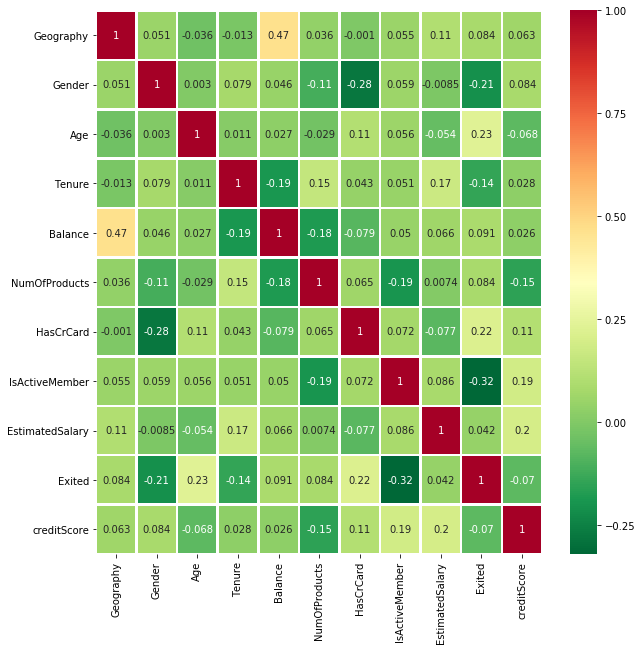

In [15]:
plt.subplots(figsize=(10,10))
sns.heatmap(corr,cmap='RdYlGn_r', linewidths=1.5, annot=True)


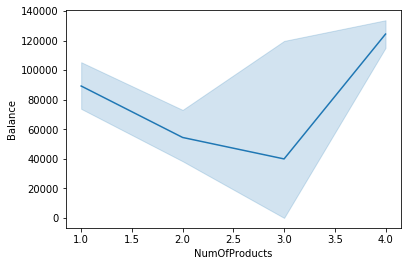

In [16]:
sns.lineplot(x='NumOfProducts', y='Balance', data = data)

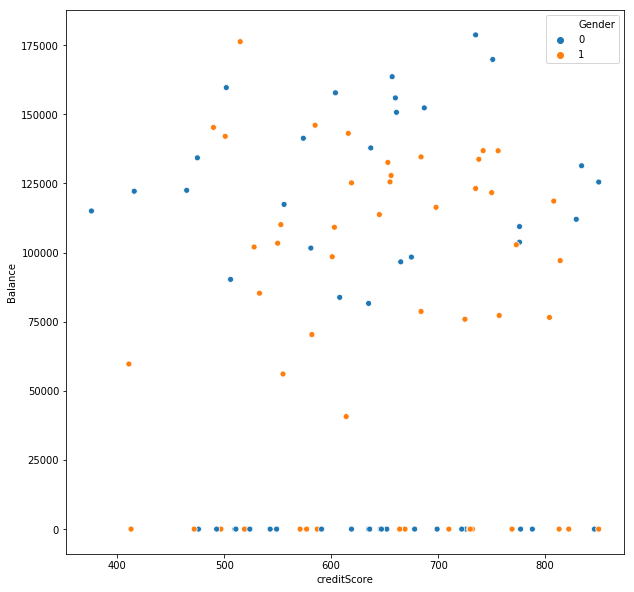

In [17]:
plt.subplots(figsize=(10,10))
sns.scatterplot(y='Balance', x='creditScore', hue='Gender', data=data)

In [18]:
db = data[(data['Balance']>.0)]
db.describe()

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,creditScore
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,1.183333,0.566667,38.066667,4.633333,117616.845333,1.516667,0.600000,0.550000,109186.430667,0.216667,640.400000
std,0.873172,0.499717,9.783879,3.124353,30356.490583,0.700887,0.494032,0.501692,52947.277358,0.415450,114.031545
min,0.000000,0.000000,19.000000,0.000000,40685.920000,1.000000,0.000000,0.000000,5097.670000,0.000000,376.000000
25%,0.000000,0.000000,31.750000,2.000000,98465.105000,1.000000,0.000000,0.000000,74136.807500,0.000000,555.750000
50%,1.000000,1.000000,37.000000,4.000000,120154.185000,1.000000,1.000000,1.000000,111487.045000,0.000000,649.000000
75%,2.000000,1.000000,43.250000,8.000000,137103.700000,2.000000,1.000000,1.000000,156746.772500,0.000000,735.750000
max,2.000000,1.000000,61.000000,10.000000,178718.190000,4.000000,1.000000,1.000000,198059.160000,1.000000,850.000000


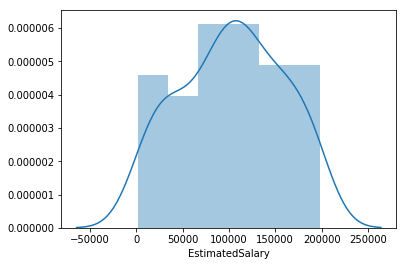

In [19]:
sns.distplot(data['EstimatedSalary'])

# Tree
1. Exited 82%
2. CS .023 :(
3.

In [20]:
Y = data.loc[:, "Exited"]
X = data.loc[:, "Geography":"EstimatedSalary"]
X['cs'] = data['creditScore']

In [21]:
clf = tree.DecisionTreeClassifier(max_depth = 2)
clf = clf.fit(X, Y)


In [22]:
#clf.score(X,Y)


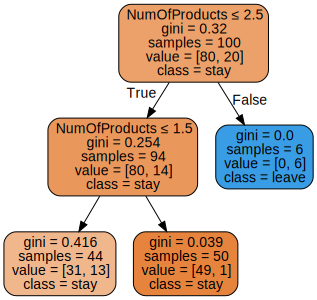

In [23]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names = X.columns,  
                         class_names = ["stay","leave"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# Keras

In [24]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [25]:
# scale data as features have vastly different scales, e.g. mins and maxes
df_scaled = preprocessing.scale(data)
# convert back to pd datafrme
df_scaled = pd.DataFrame(data, columns=data.columns)
df_scaled.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,creditScore
0,0,0,42,2,0.00,1,1,1,101348.88,1,619
1,1,0,41,1,83807.86,1,0,1,112542.58,0,608
2,0,0,42,8,159660.80,3,1,0,113931.57,1,502
3,0,0,39,1,0.00,2,0,0,93826.63,0,699
4,1,0,43,2,125510.82,1,1,1,79084.10,0,850


In [26]:
X_train, X_val, y_train, y_val = train_test_split(X,Y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2)

# create Sequential model
model = Sequential()
# first layer
# Dense is a fully connected layer
# input_dim = 8 as we have 8 features
model.add(Dense(32, activation='relu', input_dim=10))
# second layer
model.add(Dense(16, activation='relu'))
#model.add(Dense(8, activation='relu'))

# output layer
# sigmoid as we need values between 0 and 1
model.add(Dense(1, activation='sigmoid'))
# define parameters of training model
model.compile(
              optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
)
# train model
model.fit(X_train, y_train, epochs=200)
# test the model accuracy
scores = model.evaluate(X_train, y_train)
print('Training Accuracy: %.f%%\n' %(scores[1]*100))
scores = model.evaluate(X_val,y_val)
print('Testing Accuracy: %.2f%%\n' % (scores[1]*100))


Epoch 1/200
64/64 [==============================] - 0s 4ms/step - loss: 1251.1357 - accuracy: 0.4844
Epoch 2/200
64/64 [==============================] - 0s 140us/step - loss: 762.4191 - accuracy: 0.5938
Epoch 3/200
64/64 [==============================] - 0s 91us/step - loss: 574.9050 - accuracy: 0.8281
Epoch 4/200
64/64 [==============================] - 0s 210us/step - loss: 412.3410 - accuracy: 0.8125
Epoch 5/200
64/64 [==============================] - 0s 199us/step - loss: 393.3339 - accuracy: 0.7344
Epoch 6/200
64/64 [==============================] - 0s 119us/step - loss: 424.8113 - accuracy: 0.6562
Epoch 7/200
64/64 [==============================] - 0s 113us/step - loss: 365.1003 - accuracy: 0.6406
Epoch 8/200
64/64 [==============================] - 0s 118us/step - loss: 271.5977 - accuracy: 0.8125
Epoch 9/200
64/64 [==============================] - 0s 168us/step - loss: 294.8805 - accuracy: 0.8281
Epoch 10/200
64/64 [==============================] - 0s 161us/step - loss:

64/64 [==============================] - 0s 65us/step - loss: 32.3292 - accuracy: 0.8438
Epoch 160/200
64/64 [==============================] - 0s 94us/step - loss: 29.0225 - accuracy: 0.7656
Epoch 161/200
64/64 [==============================] - 0s 96us/step - loss: 26.0496 - accuracy: 0.6875
Epoch 162/200
64/64 [==============================] - 0s 80us/step - loss: 43.9079 - accuracy: 0.6562
Epoch 163/200
64/64 [==============================] - 0s 75us/step - loss: 27.1937 - accuracy: 0.7031
Epoch 164/200
64/64 [==============================] - 0s 89us/step - loss: 13.9141 - accuracy: 0.8125
Epoch 165/200
64/64 [==============================] - 0s 62us/step - loss: 33.9478 - accuracy: 0.6875
Epoch 166/200
64/64 [==============================] - 0s 82us/step - loss: 58.5448 - accuracy: 0.8281
Epoch 167/200
64/64 [==============================] - 0s 91us/step - loss: 42.6783 - accuracy: 0.7969
Epoch 168/200
64/64 [==============================] - 0s 103us/step - loss: 28.8229 - 

# Video Game Sales

In [27]:
df = pd.read_csv("vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [28]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


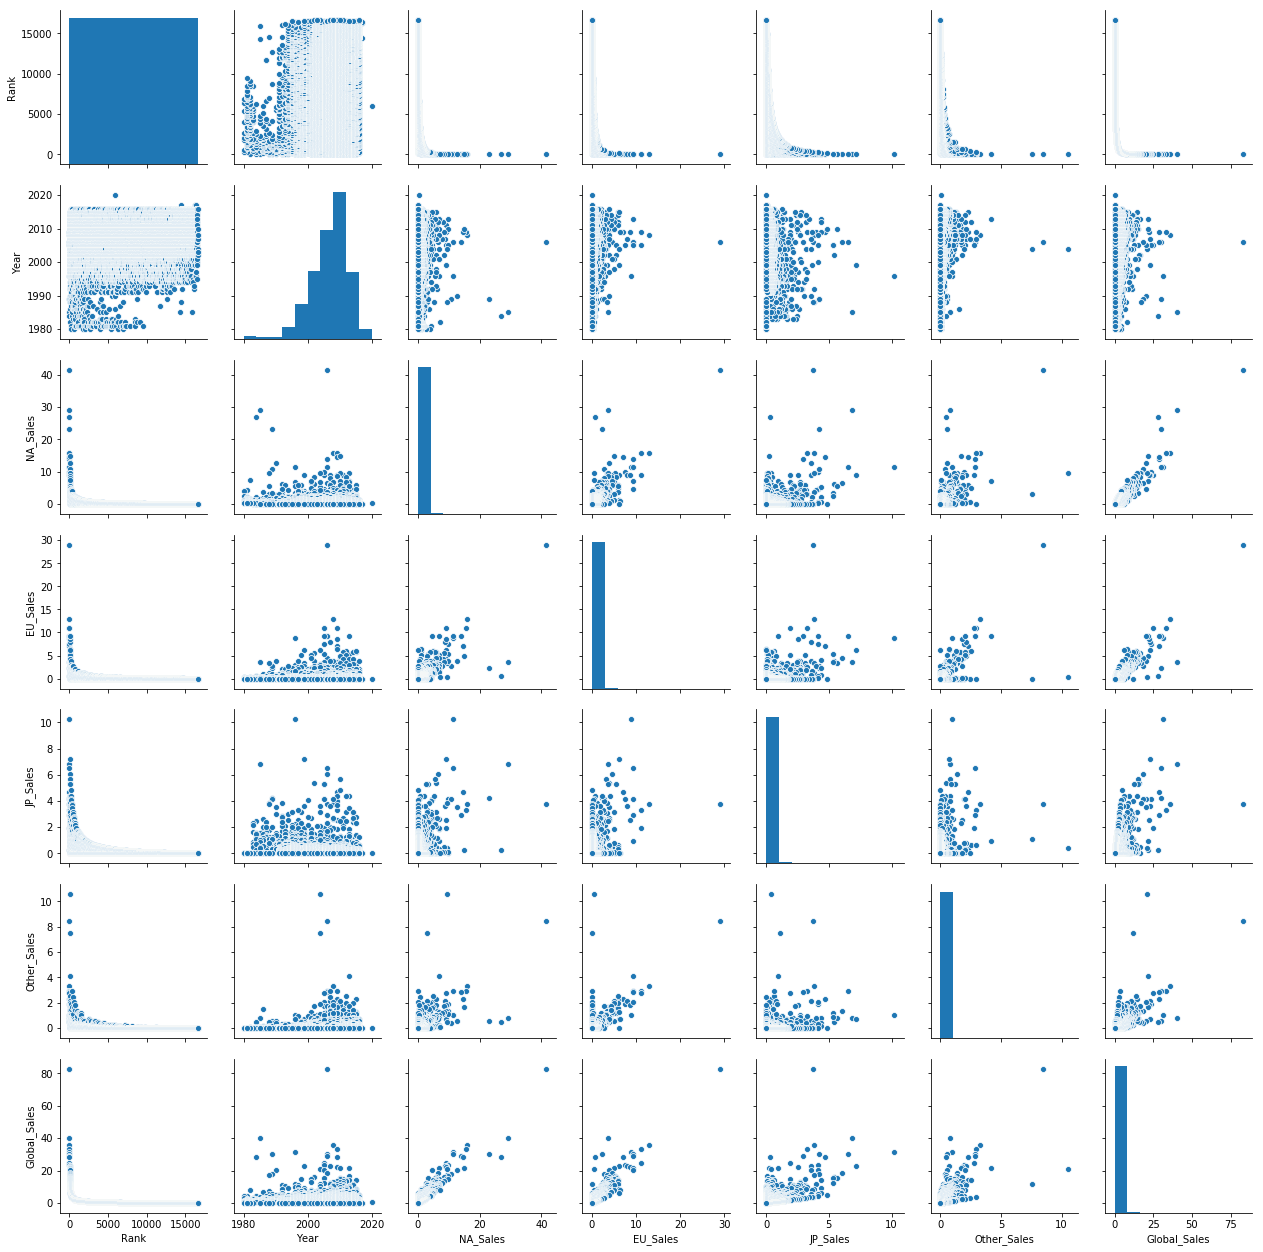

In [29]:
sns.pairplot(df)

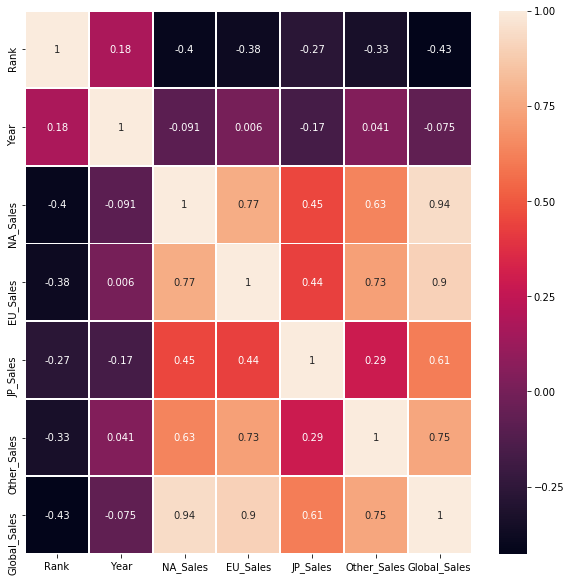

In [30]:
corr = df.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr, linewidth=1.00, annot=True)

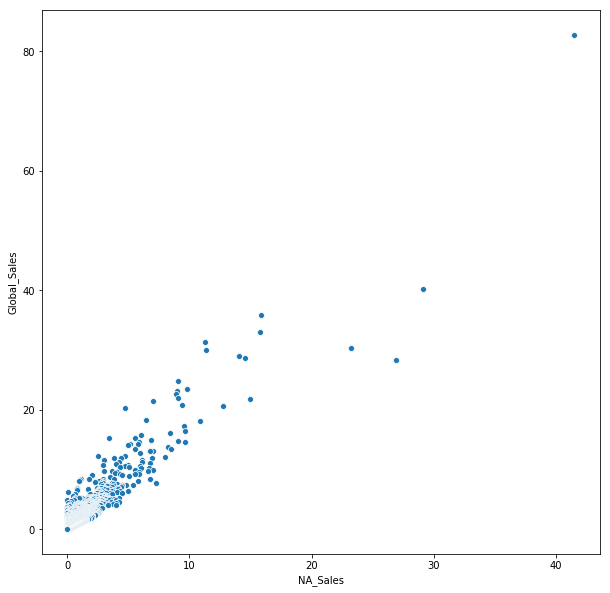

In [31]:
plt.subplots(figsize=(10,10))
sns.scatterplot(x='NA_Sales', y="Global_Sales", data=df)

In [32]:
# df = df[0:500]
# df.to_json('vg_data.json', orient='records')
# df['Platform'] = pd.Categorical(df["Platform"])
# df['Platform'] = df['Platform'].cat.codes


# df['Publisher'] = pd.Categorical(df["Publisher"])
# df['Publisher'] = df['Publisher'].cat.codes
# df = df.drop("Platform_C", axis=1)
# df.head()

# df = df.drop('Name', axis=1)
df = np.float32(df)
df
df = pd.DataFrame(data=df, columns=cols)
df.head()

ValueError: could not convert string to float: 'Wii Sports'

In [ ]:
X = df.loc[:, "Platform":"Other_Sales"]
Y = df.loc[:, "Global_Sales"]

In [ ]:
df.info()

In [ ]:
# X_train, X_val, y_train, y_val = train_test_split(X,Y, test_size=0.2)
# X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2)

# # create Sequential model
# model = Sequential()
# # first layer
# # Dense is a fully connected layer
# # input_dim = 8 as we have 8 features
# model.add(Dense(32, activation='relu', input_dim=8))
# # second layer
# model.add(Dense(16, activation='relu'))
# #model.add(Dense(8, activation='relu'))

# # output layer
# # sigmoid as we need values between 0 and 1
# model.add(Dense(1, activation='sigmoid'))
# # define parameters of training model
# model.compile(
#               optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy']
# )
# # train model
# model.fit(X_train, y_train, epochs=200)
# # test the model accuracy
# scores = model.evaluate(X_train, y_train)
# print('Training Accuracy: %.f%%\n' %(scores[1]*100))
# scores = model.evaluate(X_val,y_val)
# print('Testing Accuracy: %.2f%%\n' % (scores[1]*100))


In [ ]:
t = tree.DecisionTreeClassifier(max_depth = 2)
t = t.fit(X, Y)
t.score(X,Y)

In [2]:
data2 = pd.read_csv('vg_data_2.csv')
data2.head(-5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data2['Critic_Count'].describe()

count    8137.000000
mean       26.360821
std        18.980495
min         3.000000
25%        12.000000
50%        21.000000
75%        36.000000
max       113.000000
Name: Critic_Count, dtype: float64

In [4]:
data2.isnull().sum(axis=0)

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [5]:
df2 = data2[data2['Critic_Count'].notna() & data2['Critic_Score'].notna() & data2['User_Count'].notna() ]

In [6]:
df2.head(-5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
11,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0,Nintendo,E
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,Nintendo,E


In [7]:
df2 = df2[:500]

In [8]:
df2.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [9]:
df22 = pd.read_csv('vg_sales_2.csv')

In [23]:
df2 = df2[:500]

In [24]:
df2['Year_of_Release'] = df2['Year_of_Release'].fillna(2000)


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 586
Data columns (total 16 columns):
Name               400 non-null object
Platform           400 non-null object
Year_of_Release    400 non-null float64
Genre              400 non-null object
Publisher          400 non-null object
NA_Sales           400 non-null float64
EU_Sales           400 non-null float64
JP_Sales           400 non-null float64
Other_Sales        400 non-null float64
Global_Sales       400 non-null float64
Critic_Score       400 non-null float64
Critic_Count       400 non-null float64
User_Score         400 non-null object
User_Count         400 non-null float64
Developer          400 non-null object
Rating             400 non-null object
dtypes: float64(9), object(7)
memory usage: 53.1+ KB


In [32]:
#df2.to_csv('finalsales.csv')
df2.head()
df2.drop(df2.columns[0], axis=1)


,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
11,DS,2005.0,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0,Nintendo,E
13,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E
14,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E
15,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,Nintendo,E


In [39]:
f = pd.read_csv('finalsales.csv')
f = f.loc[:, 'Name':'Rating']
f.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
4,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [42]:
dl_csv(f, 'hey')

In [43]:
f.to_json(orient='records')

'[{"Name":"Wii Sports","Platform":"Wii","Year_of_Release":2006.0,"Genre":"Sports","Publisher":"Nintendo","NA_Sales":41.36,"EU_Sales":28.96,"JP_Sales":3.77,"Other_Sales":8.45,"Global_Sales":82.53,"Critic_Score":76.0,"Critic_Count":51.0,"User_Score":8.0,"User_Count":322.0,"Developer":"Nintendo","Rating":"E"},{"Name":"Mario Kart Wii","Platform":"Wii","Year_of_Release":2008.0,"Genre":"Racing","Publisher":"Nintendo","NA_Sales":15.68,"EU_Sales":12.76,"JP_Sales":3.79,"Other_Sales":3.29,"Global_Sales":35.52,"Critic_Score":82.0,"Critic_Count":73.0,"User_Score":8.3,"User_Count":709.0,"Developer":"Nintendo","Rating":"E"},{"Name":"Wii Sports Resort","Platform":"Wii","Year_of_Release":2009.0,"Genre":"Sports","Publisher":"Nintendo","NA_Sales":15.61,"EU_Sales":10.93,"JP_Sales":3.28,"Other_Sales":2.95,"Global_Sales":32.77,"Critic_Score":80.0,"Critic_Count":73.0,"User_Score":8.0,"User_Count":192.0,"Developer":"Nintendo","Rating":"E"},{"Name":"New Super Mario Bros.","Platform":"DS","Year_of_Release":200